In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import glob

import matplotlib.pyplot as plt

In [3]:
# Read the CSV file
df = pd.read_csv("O:\\Man\\Public\\sharing-4270-CERM\\MATNEW\\DMI Long Data Series\\1876 Data\\DMIRep21-02\\dk_daily_pr_esbjerg_blended_1874_2025.csv", delimiter = ';')

In [4]:
df

,stat_no,year,month,day,hour,pr
0,25140,1874,1,1,8,1.3
1,25140,1874,1,2,8,1.0
2,25140,1874,1,3,8,2.3
3,25140,1874,1,4,8,6.8
4,25140,1874,1,5,8,3.7
...,...,...,...,...,...,...
55207,534020,2025,2,24,23,19.6
55208,534020,2025,2,25,23,1.0
55209,534020,2025,2,26,23,0.2
55210,534020,2025,2,27,23,0.8


In [5]:
# Filter data between 1874 and 2024
df = df[(df["year"] >= 1874) & (df["year"] <= 2024)]

In [6]:
# Filter data between May and September
#df = df[df['month'].isin([5, 6, 7, 8, 9])]

In [7]:
# Find maximum 'pr' for each unique 'year'
max_pr_per_year = df.groupby("year")["pr"].max().reset_index()

In [8]:
max_pr_per_year.to_csv('O:\\Man\\Public\\sharing-4270-CERM\\MATNEW\\CC_det_attr\\Time Series CSV\\annual_max_pr_station_annual.csv', index=False, sep = ';')

In [9]:
#Import GMST anomalies (relative to 1850-1900)
#Pathway to GMST 
GMST_file_path = glob.glob(f"O:\\Man\\Public\\sharing-4270-CERM\\MATNEW\\Berkeley_GMST\\*anomalies.nc")
    
#Open GMST file
GMST_ds = xr.open_dataset(GMST_file_path[0])
    
#Create year variable 
GMST_ds['year'] = GMST_ds['time']
    
#Calculate rolling mean
GMST_ds['tas'] = GMST_ds.temperature.rolling(time=4).mean()
    
# Select data 
GMST_ds = GMST_ds.sel(
time=(
(GMST_ds["year"] >= 1874) &  
(GMST_ds["year"] <= 2024)  
), drop = True)
    
#Save to dataframe
GMST_df = GMST_ds.tas.to_dataframe().reset_index()

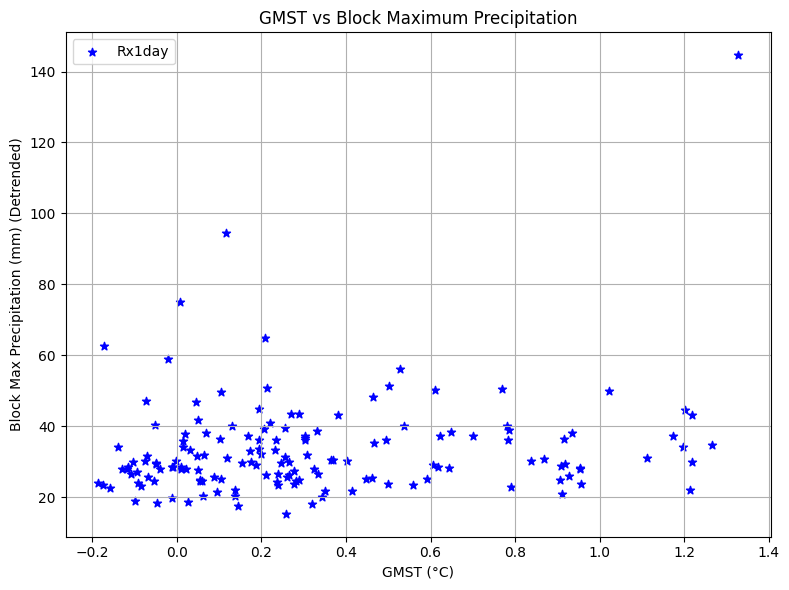

In [16]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(GMST_df.tas, max_pr_per_year.pr, color='blue', marker = '*', label='Rx1day')

# Adding labels and title
plt.xlabel('GMST (°C)')
plt.ylabel('Rx1day (mm) ')
plt.title('GMST vs Rx1day')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()